Minh Tan Pham A01215507

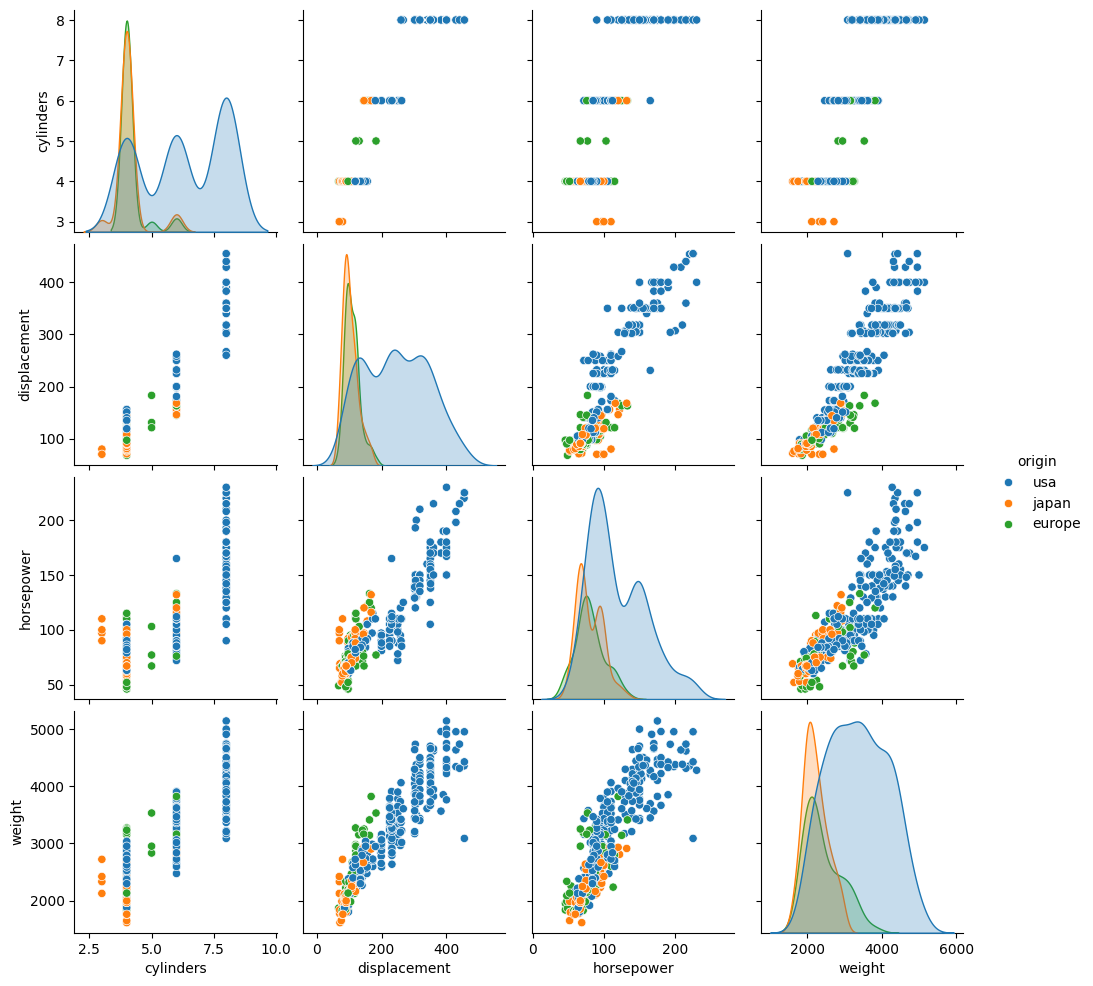

In [193]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv("Automobile.csv")

# Draw scatter plots of cylinders, displacement, horsepower, and weight
sns.pairplot(df, vars=["cylinders", "displacement", "horsepower", "weight"], hue="origin")
plt.show()

<Axes: xlabel='cylinders', ylabel='mpg'>

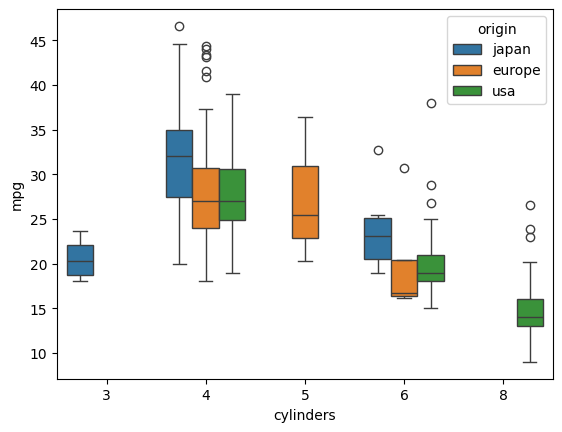

In [194]:
# Draw a boxplot to compare the mpg distributions across cylinders
sns.boxplot(x="cylinders", y="mpg", hue="origin", data=df)

Controlled Dataset

In [195]:
import numpy as np
import scipy.stats as stats

# Load the dataset from a CSV file
df = pd.read_csv("Automobile.csv")

# Take a random sample of 100 records
samples = df.sample(100)
sample_data = samples['weight']

# Define Hypotheses
null_hypothesis = "The sample mean is equal to the population mean."
alternative_hypothesis = "The sample mean is not equal to the population mean."

# Calculate Sample and Population Parameters
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
population_mean = np.mean(df['weight'])
sample_size = len(sample_data)

z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Make Decision
alpha = 0.05
if p_value < alpha:
    decision = "Reject Null Hypothesis"
else:
    decision = "Fail to Reject Null Hypothesis"

print(f'Sample Mean: {sample_mean}')
print(f'Population Mean: {population_mean}')
print(f'Z-Score: {z_score}')
print(f'P-Value: {p_value}')
print(f'Decision: {decision}')

Sample Mean: 3092.79
Population Mean: 2970.424623115578
Z-Score: 1.3557943587181536
P-Value: 0.17516460672112455
Decision: Fail to Reject Null Hypothesis


In [196]:
# Z-value for 95% confidence (commonly used value is 1.96)
z_score = 1.96

# Initialize lists to store the lower and upper bounds of the confidence intervals
lower_bounds = []
upper_bounds = []
intervals = []

# Calculate the confidence intervals
for idx, row in df.iterrows():
    # Sample mean is the "Weight: Total" for each origin
    sample_mean = row['weight']
    
    sample_std = df['weight'].std()
    
    # Sample size 
    sample_size = 100
    
    # Calculate the margin of error for a 95% confidence interval
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    
    # Calculate the lower and upper bounds of the 95% confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    # Append to lists
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Add the confidence intervals to the DataFrame for easier visualization later
df['Lower Bound'] = lower_bounds
df['Upper Bound'] = upper_bounds

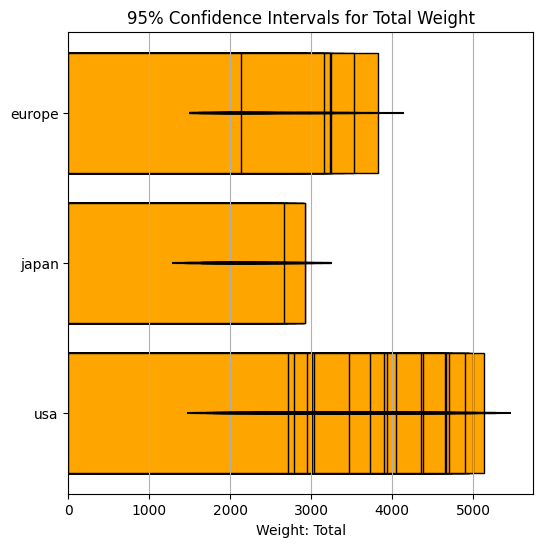

In [197]:
# Extract the relevant data for plotting
countries = df['origin']
sample_means = df['weight']
margins_of_error =  df['Upper Bound']- df['Lower Bound']

# Create the plot
plt.figure(figsize=(6, 6))
plt.barh(countries, sample_means, xerr=margins_of_error, 
        color='orange', edgecolor='black')
plt.xlabel('Weight: Total')
plt.title('95% Confidence Intervals for Total Weight')
plt.grid(axis='x')

# Show the plot
plt.show()

Random Dataset

In [198]:
import numpy as np
import scipy.stats as stats

# Define the size of the dataset
size = 100
# Define the possible origins
origins = ['canada', 'ireland', 'swiss']
# Generate random 'origin' data
random_origins = np.random.choice(origins, size)
# Generate random 'weight' data
random_weights = np.random.randint(2000, 5000, size)
# Create the DataFrame
df_rand = pd.DataFrame({
    'origin': random_origins,
    'weight': random_weights
})
# Take a random sample of 100 records
samples = df_rand.sample(100)
sample_data = samples['weight']
# Define Hypotheses
null_hypothesis = "The sample mean is equal to the population mean."
alternative_hypothesis = "The sample mean is not equal to the population mean."
# Calculate Sample and Population Parameters
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
population_mean = np.mean(df['weight'])
sample_size = len(sample_data)
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
# Make Decision
alpha = 0.05
if p_value < alpha:
    decision = "Reject Null Hypothesis"
else:
    decision = "Fail to Reject Null Hypothesis"

print(f'Sample Mean: {sample_mean}')
print(f'Population Mean: {population_mean}')
print(f'Z-Score: {z_score}')
print(f'P-Value: {p_value}')
print(f'Decision: {decision}')

Sample Mean: 3525.33
Population Mean: 2970.424623115578
Z-Score: 6.789002437963799
P-Value: 1.1291190205042767e-11
Decision: Reject Null Hypothesis


In [199]:
# Z-value for 95% confidence (commonly used value is 1.96)
z_score = 1.96

# Initialize lists to store the lower and upper bounds of the confidence intervals
lower_bounds = []
upper_bounds = []

# Calculate the confidence intervals
for idx, row in df_rand.iterrows():
    # Sample mean is the "Weight: Total" for each origin
    sample_mean = row['weight']
    
    sample_std = df['weight'].std()
    
    # Sample size 
    sample_size = 100
    
    # Calculate the margin of error for a 95% confidence interval
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    
    # Calculate the lower and upper bounds of the 95% confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    # Append to lists
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Add the confidence intervals to the DataFrame for easier visualization later
df_rand['Lower Bound'] = lower_bounds
df_rand['Upper Bound'] = upper_bounds

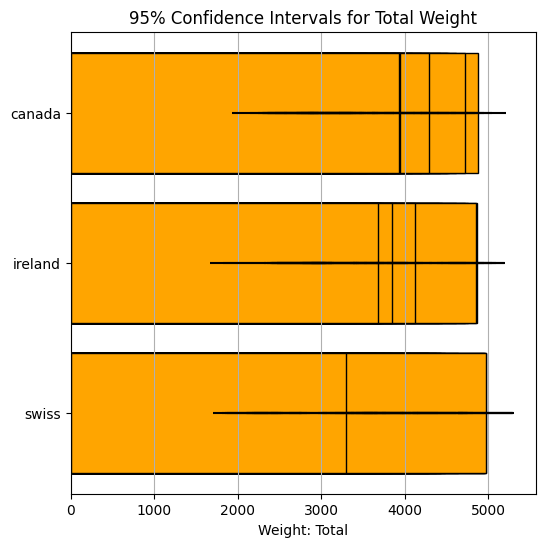

In [200]:
# Extract the relevant data for plotting
countries = df_rand['origin']
sample_means = df_rand['weight']
margins_of_error =  df_rand['Upper Bound']- df_rand['Lower Bound']

# Create the plot
plt.figure(figsize=(6, 6))
plt.barh(countries, sample_means, xerr=margins_of_error, 
        color='orange', edgecolor='black')
plt.xlabel('Weight: Total')
plt.title('95% Confidence Intervals for Total Weight')
plt.grid(axis='x')

# Show the plot
plt.show()